# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [7]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# fashion_mnist.load_data() returns two tuples and splits the dataset into training and testing sets, 
# with 60,000 training images and 10,000 testing images.
# Each image is 28x28 pixels in grayscale.
# (X_train, y_train) for training data and labels
# (X_test, y_test) for testing data and labels  

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# Inspect the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')

Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


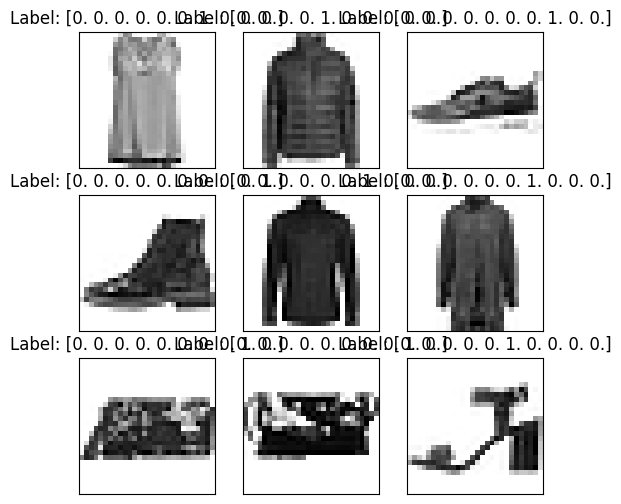

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Verify the data looks as expected

# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

# gray_r plots in reversed grayscale
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest') 
    ax.set_title(f"Label: {y_train[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

>The data looks as expected, as they are 28x28 pixel images, the quality is low.  The labels are the one-hot encoded instead of the class names.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()

# Flatten the 28x28 images into vectors
model.add(Flatten())  

# You can use `model.add(<layer>)` to add layers to the model
model.add(Dense(10, activation='softmax'))  

# Compile the model using `model.compile()`
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()  

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model with `model.fit()`
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"\nTest lost: {test_loss}")
print(f"\nTest accuracy: {test_accuracy}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7407 - loss: 0.7807 - val_accuracy: 0.8266 - val_loss: 0.5075
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8415 - loss: 0.4693 - val_accuracy: 0.8315 - val_loss: 0.4836
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8523 - loss: 0.4342 - val_accuracy: 0.8351 - val_loss: 0.4689
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8544 - loss: 0.4176 - val_accuracy: 0.8130 - val_loss: 0.5118
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8553 - loss: 0.4156 - val_accuracy: 0.8402 - val_loss: 0.4640
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8466 - loss: 0.4484

Test lost: 0.4640061557292938

Test accuracy: 0.8402000069618225


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

>The performance of the baseline model is acceptable with loss of 0.464 and accuracy of 84.0%.  Initially I used ReLU activation but then learned that ReLU activation is not compatible with categorical crossentropy loss.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [12]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a flatten layer
model.add(Flatten())

# Add a dense layer
model.add(Dense(10, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,650 (846.29 KB)

 Trainable params: 216,650 (846.29 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Train the model 
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"\nTest lost: {test_loss}")
print(f"\nTest accuracy: {test_accuracy}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8143 - loss: 0.5229 - val_accuracy: 0.8736 - val_loss: 0.3527
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9004 - loss: 0.2820 - val_accuracy: 0.8867 - val_loss: 0.3162
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9134 - loss: 0.2437 - val_accuracy: 0.8902 - val_loss: 0.3009
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9209 - loss: 0.2228 - val_accuracy: 0.9023 - val_loss: 0.2847
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9304 - loss: 0.1903 - val_accuracy: 0.9033 - val_loss: 0.2834
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9026 - loss: 0.2885

Test lost: 0.28340944647789

Test accuracy: 0.9032999873161316


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

>Yes, the CNN model performed slightly better than the baseline model.  The CNN model had loss of 
0.283 (compared to 0.464) and accuracy of 90.3% (compared to 84.0%).  As the only difference was the added CNN layer, it should have contributed to the improvement.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [16]:
import pandas as pd

# A. Test Hyperparameters

# Run an experiment with different number of filters using a loop

# Define the filter sizes to experiment with
filter_sizes = [32, 64, 128]

# Initialize an empty list to store results
results_df = []

for filters in filter_sizes:
      print(f"Training model with {filters} filters")
      
      # Initialize a simple CNN model
      model = Sequential()
      model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
      model.add(Flatten())
      model.add(Dense(10, activation='softmax'))  

      # Compile the model   
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      
      # Train the model
      model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

      # Evaluate the model
      test_loss, test_accuracy = model.evaluate(X_test, y_test)
      results_df.append({'filters': filters, 'test_loss': test_loss, 'test_accuracy': test_accuracy})

# Convert results to DataFrame and sort by test accuracy
results_df = pd.DataFrame(results_df)
results_df.sort_values(by='test_accuracy', ascending=False, inplace=True)  
print(results_df)

Training model with 32 filters


/home/labber/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8126 - loss: 0.5341 - val_accuracy: 0.8831 - val_loss: 0.3349
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8975 - loss: 0.2829 - val_accuracy: 0.8860 - val_loss: 0.3051
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9121 - loss: 0.2472 - val_accuracy: 0.8939 - val_loss: 0.3020
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9236 - loss: 0.2146 - val_accuracy: 0.8971 - val_loss: 0.2917
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9297 - loss: 0.1950 - val_accuracy: 0.8980 - val_loss: 0.2945
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9001 - loss: 0.2979
Training model with 64 filters
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8227 - loss: 0.5057 - val_accuracy: 0.8815 - val_loss: 0.3267
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8980 - loss: 0.2816 - val_accuracy: 0.8939 -

In [17]:
from keras.layers import Dropout

# B. Test presence or absence of regularization

# Run an experiment with the presence or absence of regularization (dropout)

# Define the dropout options to experiment with
dropout_range = [0, .2, .3, .5]

# Initialize an empty list to store results
results_df = []

for dropout in dropout_range:
      print(f"Training model with {dropout} dropout rate")
      
      # Initialize a simple CNN model
      model = Sequential()
      model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
      
      # Add dropout layer with the specified dropout rate
      model.add(Dropout(dropout))
      
      model.add(Flatten())
      model.add(Dense(10, activation='softmax'))  

      # Compile the model   
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      
      # Train the model
      model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

      # Evaluate the model
      test_loss, test_accuracy = model.evaluate(X_test, y_test)
      results_df.append({'dropout': dropout, 'test_loss': test_loss, 'test_accuracy': test_accuracy}) 

# Convert results to DataFrame and sort by test accuracy
results_df = pd.DataFrame(results_df)
results_df.sort_values(by='test_accuracy', ascending=False, inplace=True)
print(results_df)

Training model with 0 rate


/home/labber/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8168 - loss: 0.5214 - val_accuracy: 0.8803 - val_loss: 0.3368
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8972 - loss: 0.2874 - val_accuracy: 0.8875 - val_loss: 0.3147
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9124 - loss: 0.2439 - val_accuracy: 0.8897 - val_loss: 0.3114
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9222 - loss: 0.2170 - val_accuracy: 0.8948 - val_loss: 0.2977
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9309 - loss: 0.1907 - val_accuracy: 0.8991 - val_loss: 0.2907
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9018 - loss: 0.2948
Training model with 0.2 rate
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8069 - loss: 0.5460 - val_accuracy: 0.8712 - val_loss: 0.3538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8894 - loss: 0.3071 - val_accuracy: 0.884

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

>When testing the filter size, 128 yielded the best accuracy with a loss of 0.305 and an accuracy of 90.2%.  However, 64 yielded a slightly lower loss of .291 and an accuracy of 90.1%.  

>When testing different rates of a dropout, a dropout rate of 30% yielded the best results with a loss of 0.283 and accuracy of 90.2%.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [18]:
# Final model with 128 filters and droput rate of 0.3

# Initialize an empty list to store results
results_df = []
filter_size = 128
dropout = 0.3

# Initialize the model
model = Sequential()
model.add(Conv2D(filter_size, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add dropout layer
model.add(Dropout(dropout))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))  

# Compile the model   
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
results_df.append({'dropout': dropout, 'test_loss': test_loss, 'test_accuracy': test_accuracy}) 

# Convert results to DataFrame 
results_df = pd.DataFrame(results_df)
print(results_df)

/home/labber/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8274 - loss: 0.4841 - val_accuracy: 0.8760 - val_loss: 0.3398
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8998 - loss: 0.2784 - val_accuracy: 0.8894 - val_loss: 0.3037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9153 - loss: 0.2326 - val_accuracy: 0.8896 - val_loss: 0.3121
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9266 - loss: 0.2040 - val_accuracy: 0.9018 - val_loss: 0.2875
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9346 - loss: 0.1827 - val_accuracy: 0.9013 - val_loss: 0.2974
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9005 - loss: 0.3086
   dropout  test_loss  test_accuracy
0      0.3   0.297433         0.9013


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

>The final tuned model performed significantly better than the baseline model.  With the filter size of 128 and dropout of 0.3, this tuned model had loss of 0.297 (compared to 0.464) and accuracy of 90% (compared to 84.0%).  

>The final model's improvement was likely due to the addition of the Convolutional Neural Network layer as it is suited for image data.  The slight improvement from the CNN model to the tuned model can be attributed to the hyperparmeter tuning.  Given more time, I would run experiments with other regularization techniques such as L2 regularization and tune other paramenters such as kernel size and number of layers.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.